# D(St)reams of Anomalies

## Introduction

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#import warnings
#warnings.filterwarnings("ignore")

In [268]:
df=pd.read_csv("/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-6-Khan/Data/RawData/Twitter_volume_AAPL.csv")
df

,timestamp,value
0,2015-02-26 21:42:53,104
1,2015-02-26 21:47:53,100
2,2015-02-26 21:52:53,99
3,2015-02-26 21:57:53,154
4,2015-02-26 22:02:53,120
...,...,...
15897,2015-04-23 02:27:53,44
15898,2015-04-23 02:32:53,45
15899,2015-04-23 02:37:53,48
15900,2015-04-23 02:42:53,26


In [269]:
df.dtypes

timestamp    object
value         int64
dtype: object

In [270]:
df.describe()

,value
count,15902.000000
mean,85.552320
std,321.050721
min,0.000000
25%,29.000000
50%,47.000000
75%,76.000000
max,13479.000000


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15902 entries, 0 to 15901
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  15902 non-null  object
 1   value      15902 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 248.6+ KB


In [272]:
dfTime=pd.read_csv('/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-6-Khan/Data/RawData/Twitter_volume_AAPL.csv', index_col ='timestamp', parse_dates = True)

In [273]:
dfTime

,value
timestamp,
2015-02-26 21:42:53,104
2015-02-26 21:47:53,100
2015-02-26 21:52:53,99
2015-02-26 21:57:53,154
2015-02-26 22:02:53,120
...,...
2015-04-23 02:27:53,44
2015-04-23 02:32:53,45
2015-04-23 02:37:53,48


Text(0, 0.5, '# of Mentions')

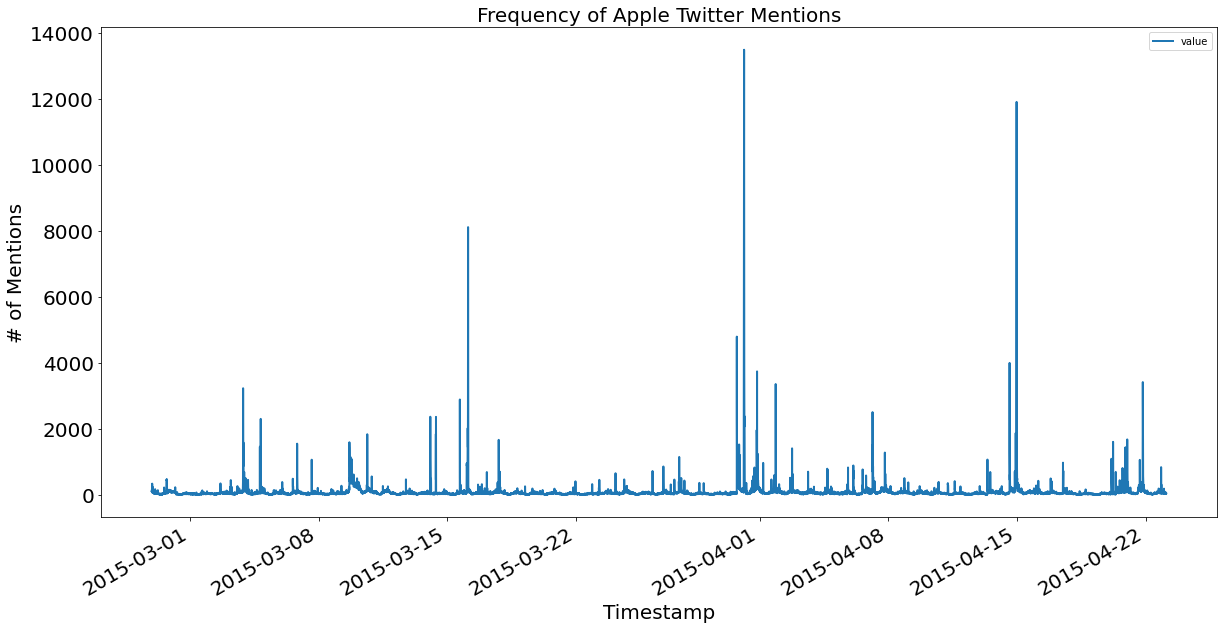

In [274]:
dfTime.plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Timestamp', fontsize=20);
plt.title('Frequency of Apple Twitter Mentions', fontsize=20)
plt.ylabel('# of Mentions', fontsize=20)

Text(0, 0.5, 'Frequency')

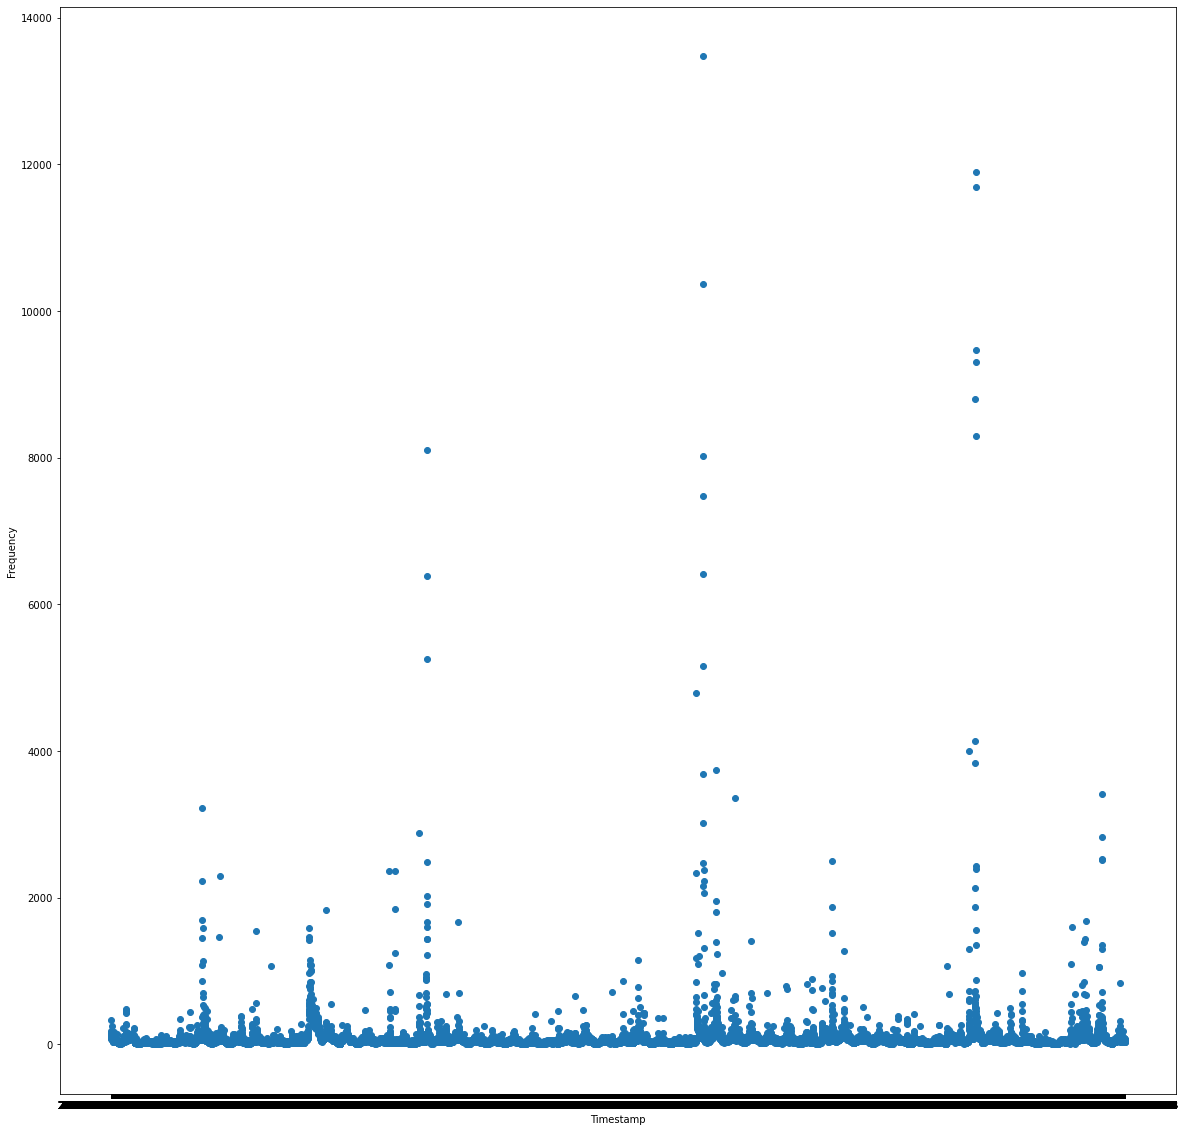

In [277]:
plt.figure(figsize=(20,20))
plt.scatter(df['timestamp'], df['value'])
plt.title('')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')

IndexError: index 1 is out of bounds for axis 1 with size 1

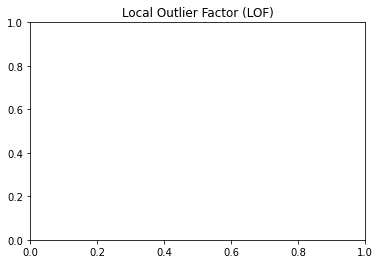

In [278]:
from sklearn.neighbors import LocalOutlierFactor

X=np.array(df['value']).reshape(-1,1)
#y=np.array(df['']).reshape(-1,1)
ground_truth = np.ones(len(X), dtype=int)

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [279]:
from sklearn.ensemble import IsolationForest

In [280]:
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test = train_test_split(df[['value']], test_size=0.3, random_state=1)

In [281]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df[['value']])
#model.fit(X_train)

IsolationForest(contamination=0.1, n_estimators=50)

In [282]:
df['scores']=model.decision_function(df[['value']])
df['anomaly']=model.predict(df[['value']])
df.head(20)

,timestamp,value,scores,anomaly
0,2015-02-26 21:42:53,104,0.043477,1
1,2015-02-26 21:47:53,100,0.050659,1
2,2015-02-26 21:52:53,99,0.057593,1
3,2015-02-26 21:57:53,154,-0.027537,-1
4,2015-02-26 22:02:53,120,0.028047,1
5,2015-02-26 22:07:53,90,0.070616,1
6,2015-02-26 22:12:53,92,0.068568,1
7,2015-02-26 22:17:53,71,0.088732,1
8,2015-02-26 22:22:53,339,-0.162852,-1
9,2015-02-26 22:27:53,178,-0.046586,-1


In [283]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                 timestamp  value    scores  anomaly
3      2015-02-26 21:57:53    154 -0.027537       -1
8      2015-02-26 22:22:53    339 -0.162852       -1
9      2015-02-26 22:27:53    178 -0.046586       -1
10     2015-02-26 22:32:53    144 -0.013210       -1
11     2015-02-26 22:37:53    143 -0.013772       -1
...                    ...    ...       ...      ...
15820  2015-04-22 20:02:53    257 -0.125671       -1
15821  2015-04-22 20:07:53    838 -0.284801       -1
15822  2015-04-22 20:12:53    177 -0.044329       -1
15824  2015-04-22 20:22:53    317 -0.146357       -1
15866  2015-04-22 23:52:53    187 -0.051701       -1

[1584 rows x 4 columns]


In [284]:
outliers_counter = len(df[df['value'] > 125])
outliers_counter

1607

In [285]:
print("Accuracy percentage:", 100*list(df['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 98.5687616677038


In [286]:
dfIF=pd.read_csv("/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-6-Khan/Data/RawData/Twitter_volume_AAPL.csv")
df.head()

,timestamp,value,scores,anomaly
0,2015-02-26 21:42:53,104,0.043477,1
1,2015-02-26 21:47:53,100,0.050659,1
2,2015-02-26 21:52:53,99,0.057593,1
3,2015-02-26 21:57:53,154,-0.027537,-1
4,2015-02-26 22:02:53,120,0.028047,1


In [287]:
#def datetime_to_float(d):
#    return d.timestamp()

In [288]:
#n_estimators=100, max_samples='auto', contamination=float(.12), \
#                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0

In [289]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=50, max_samples=2000, contamination='auto',max_features=1.0)
clf.fit(dfIF[['value']])
pred = clf.predict(dfIF[['value']])
dfIF['anomaly']=pred
outliers=dfIF.loc[dfIF['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(dfIF['anomaly'].value_counts())

 1    14735
-1     1167
Name: anomaly, dtype: int64


In [290]:
for i in range(0,len(df['timestamp'])):
    dfIF['timestamp'][i] = dfIF['timestamp'][i].replace("-", "")
    dfIF['timestamp'][i] = dfIF['timestamp'][i].replace(":", "")
    dfIF['timestamp'][i] = dfIF['timestamp'][i].replace(" ", "")

<ipython-input-290-e8c40e928dd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfIF['timestamp'][i] = dfIF['timestamp'][i].replace("-", "")
<ipython-input-290-e8c40e928dd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfIF['timestamp'][i] = dfIF['timestamp'][i].replace(":", "")
<ipython-input-290-e8c40e928dd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfIF['timestamp'][i] = dfIF['timestamp'][i].replace(" ", "")


In [291]:
dfIF.head()

,timestamp,value,anomaly
0,20150226214253,104,1
1,20150226214753,100,1
2,20150226215253,99,1
3,20150226215753,154,1
4,20150226220253,120,1


In [328]:
feature_cols = ['timestamp', 'value']
X = dfIF[feature_cols]
X

,timestamp,value
0,20150226214253,104
1,20150226214753,100
2,20150226215253,99
3,20150226215753,154
4,20150226220253,120
...,...,...
15897,20150423022753,44
15898,20150423023253,45
15899,20150423023753,48
15900,20150423024253,26


In [ ]:

#colors[-1]=(0,0,0)

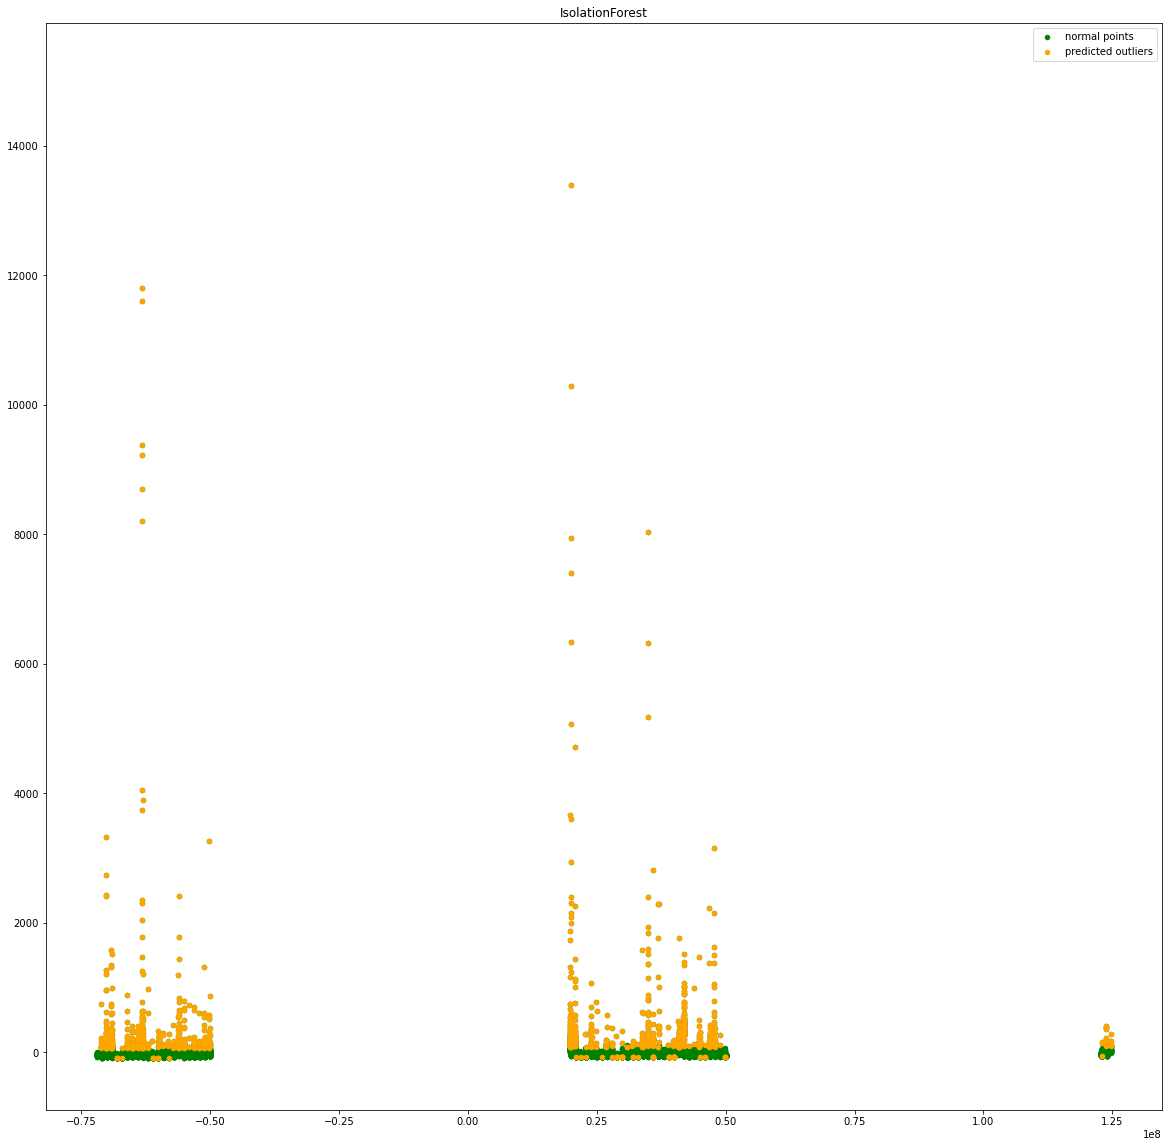

In [327]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X)
res=pd.DataFrame(pca.transform(X))
res
Z = np.array(res)
plt.figure(figsize=(20,20))
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green', s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='orange',s=20,  edgecolor="orange",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

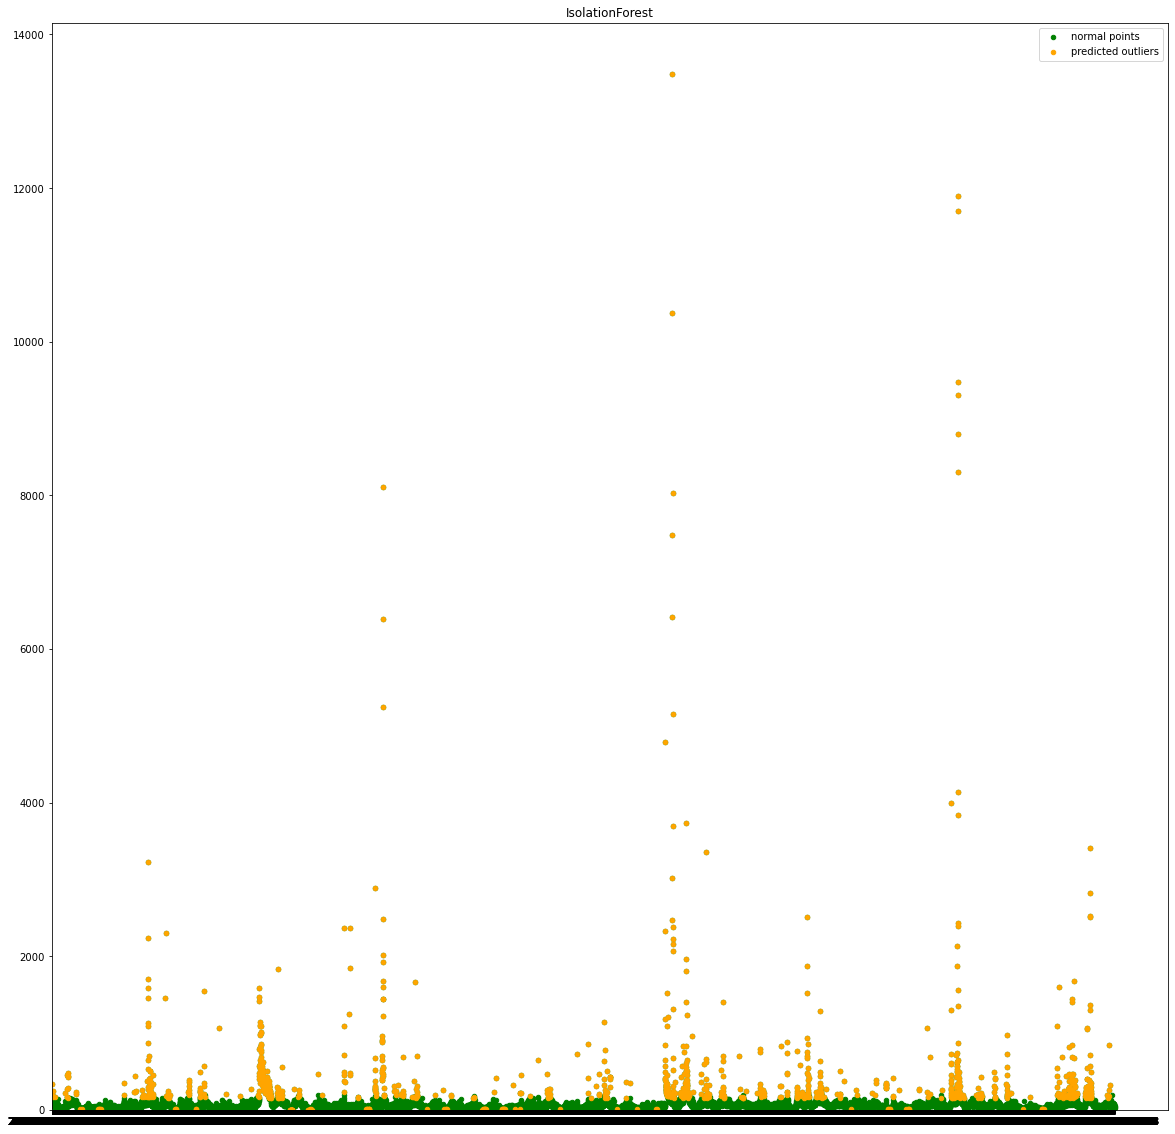

In [332]:
from sklearn.decomposition import PCA
#pca = PCA(2)
#pca.fit(X)
#res=pd.DataFrame(pca.transform(X))
Z = np.array(X)
plt.figure(figsize=(20,20))
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X['timestamp'], X['value'], c='green', s=20,label="normal points")
b1 =plt.scatter(X.iloc[outlier_index,0],X.iloc[outlier_index,1], c='orange',s=20,  edgecolor="orange",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [294]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [295]:
feature_cols = ['value']
X = df[feature_cols] # Features

In [296]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=1)

In [297]:
# train kNN detector
from pyod.models.knn import KNN
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)
# If you want to see the predictions of the training data, you can use this way:
y_train_scores = clf.decision_scores_

In [298]:
# Now we have the trained K-NN model, let's apply to the test data to get the predictions
y_test_pred = clf.predict(X_test) # outlier labels (0 or 1)
# Because it is '0' and '1', we can run a count statistic. There are 44 '1's and 456 '0's. The number of anomalies is roughly ten percent, as we have generated before:
unique, counts = np.unique(y_test_pred, return_counts=True)
dict(zip(unique, counts))
#{0: 456, 1: 44}
# And you can generate the anomaly score using clf.decision_function:
y_test_scores = clf.decision_function(X_test)

In [299]:
feature_cols = ['timestamp','value']
X = dfIF[feature_cols] # Features

In [300]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=1)

In [301]:
def genColorsDBSCAN(n_clusters_):
    colors={}
    r = 0
    b = 0
    g = 0
    color = (r, g, b)

    colors[-1]=(0,0,0)
    for i in range(0,n_clusters_):
        #while r==0 and b==0 and g==0:
        r = random.random()
        b = random.random()
        g = random.random()
        color = (r, g, b)
        colors[i]=color
        #print(colors[i])
    
    cvec=[colors[label] for label in labels]
    return cvec

In [302]:
def scaleAndNormalize(var1, var2):
    # Scaling the data to bring all the attributes to a comparable level 
    scaler = StandardScaler() 
    dfTest_scaled = scaler.fit_transform(dfTest) 
  
    # Normalizing the data so that  
    # the data approximately follows a Gaussian distribution 
    dfTest_normalized = normalize(dfTest_scaled) 
  
    # Converting the numpy array into a pandas DataFrame 
    dfTest_normalized = pd.DataFrame(dfTest_normalized)
    dfTest_normalized

    dfTest_normalized.columns = [var1, var2]
    return dfTest_normalized

In [303]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 

In [304]:
dfTest=dfIF[['value', 'timestamp']]

dfTest_normalized=scaleAndNormalize('value', 'timestamp')
dfTest_normalized

,value,timestamp
0,0.024345,-0.999704
1,0.019068,-0.999818
2,0.017749,-0.999842
3,0.089989,-0.995943
4,0.045428,-0.998968
...,...,...
15897,-0.094677,0.995508
15898,-0.092418,0.995720
15899,-0.085632,0.996327
15900,-0.135051,0.990839


In [309]:
dbsc = DBSCAN(eps = 0.03, min_samples = 20).fit(dfTest_normalized)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

print(set(labels))

n_clusters_=len(set(labels))
n_noise_=list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

{0, 1, 2, 3, 4, 5, 6, 7, -1}
Estimated number of clusters: 9
Estimated number of noise points: 129


Text(0, 0.5, 'value')

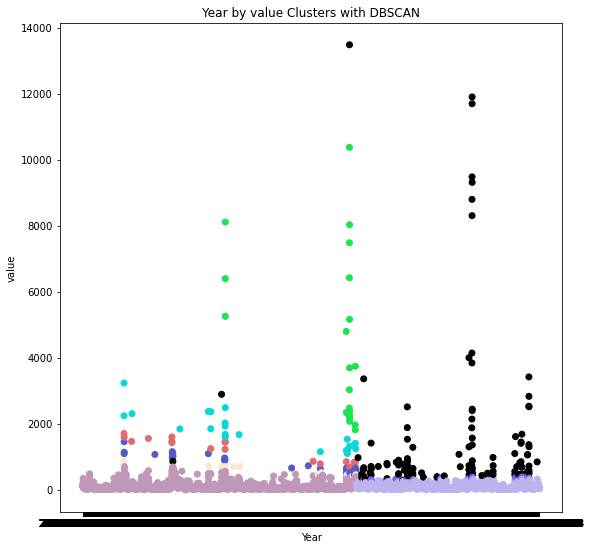

In [310]:
import random

cvec=genColorsDBSCAN(n_clusters_)

plt.figure(figsize=(9,9))
plt.scatter(dfTest['timestamp'], dfTest['value'], c=cvec)
plt.title('Year by value Clusters with DBSCAN')
plt.xlabel('Year')
plt.ylabel('value')

In [312]:
dbsc = DBSCAN(eps = 0.01, min_samples = 20).fit(dfTest_normalized)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

print(set(labels))

n_clusters_=len(set(labels))
n_noise_=list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1}
Estimated number of clusters: 11
Estimated number of noise points: 668


Text(0, 0.5, 'value')

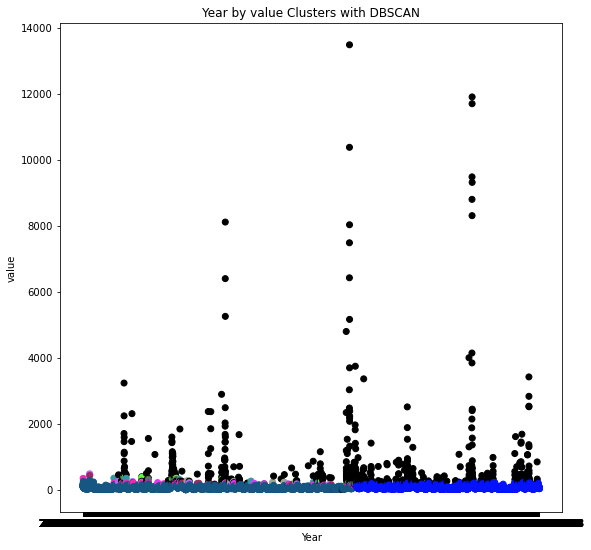

In [313]:
import random

cvec=genColorsDBSCAN(n_clusters_)

plt.figure(figsize=(9,9))
plt.scatter(dfTest['timestamp'], dfTest['value'], c=cvec)
plt.title('Year by value Clusters with DBSCAN')
plt.xlabel('Year')
plt.ylabel('value')